libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


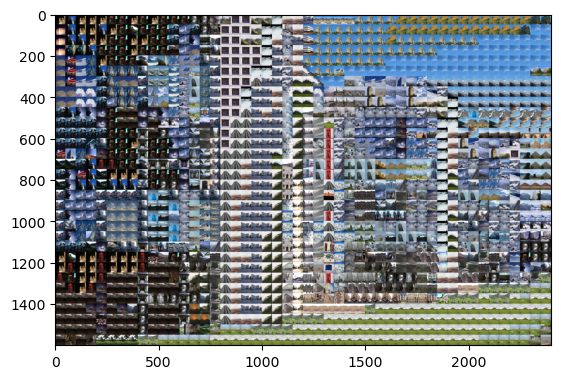

In [103]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

def histogram_similarity(hist1, hist2):
    return cv2.compareHist(hist1, hist2, cv2.HISTCMP_BHATTACHARYYA)

def resize_image(image, size):
    return cv2.resize(image, size, interpolation=cv2.INTER_AREA)

def is_valid_image(file_path):
    return not file_path.endswith(".DS_Store")

target_image = cv2.imread("./dataset/mosaic_target2.jpg")

tile_size_x = 50
tile_size_y = 50
hist_size = 16

target_height, target_width, _ = target_image.shape

num_tiles_x = target_width
num_tiles_y = target_height

mosaic = np.zeros_like(target_image)

candidate_image_dir_1 = "./dataset/manmade_training/"
candidate_image_dir_2 = "./dataset/natural_training/"

candidate_images_set1 = [os.path.join(candidate_image_dir_1, img) for img in os.listdir(candidate_image_dir_1) if is_valid_image(img)]
candidate_images_set2 = [os.path.join(candidate_image_dir_2, img) for img in os.listdir(candidate_image_dir_2) if is_valid_image(img)]

candidate_histograms = {}
for candidate_image_path in candidate_images_set1 + candidate_images_set2:
    candidate_image = cv2.imread(candidate_image_path)
    if candidate_image is not None:
        candidate_image = resize_image(candidate_image, (tile_size_x, tile_size_y))
        
        candidate_hist = cv2.calcHist([candidate_image], [0, 1, 2], None, [hist_size, hist_size, hist_size], [0, 256, 0, 256, 0, 256])
        candidate_histograms[candidate_image_path] = candidate_hist

for y in range(0, target_height, tile_size_y):
    for x in range(0, target_width, tile_size_x):
        y_max = min(y + tile_size_y, target_height)
        x_max = min(x + tile_size_x, target_width)
        tile = target_image[y:y_max, x:x_max]
        tile_hist = cv2.calcHist([tile], [0, 1, 2], None, [hist_size, hist_size, hist_size], [0, 256, 0, 256, 0, 256])

        best_match_score = float("inf")
        best_match_image = None

        for candidate_image_path in candidate_images_set1 + candidate_images_set2:
            if candidate_histograms.get(candidate_image_path) is not None:
                candidate_hist = candidate_histograms[candidate_image_path]
                similarity = histogram_similarity(tile_hist, candidate_hist)

                if similarity < best_match_score:
                    best_match_score = similarity
                    best_match_image_path = candidate_image_path

        best_match_image = cv2.imread(best_match_image_path)
        best_match_image = resize_image(best_match_image, (x_max - x, y_max - y))

        mosaic[y:y_max, x:x_max] = best_match_image
        
plt.imshow(cv2.cvtColor(mosaic, cv2.COLOR_BGR2RGB))
plt.show()